In [4]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Configurar semilla para reproducibilidad
np.random.seed(42)

In [6]:
#Generar fechas de 2023 (diarias)
fechas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

In [7]:
#generar datos aleatorios
data= {
    'Fecha' : fechas,
    'Categoria' : np.random.choice(['Electronicos','Ropa','Hogar'], size=len(fechas)),
    'Precio_Unitario': np.random.uniform(10, 500, size=len(fechas)),
    'Cantidad' : np.random.randint(1, 20, size=len(fechas))
}

In [8]:
#Crear DataFrame
df = pd.DataFrame(data)

In [9]:
#Calcular venta diaria
df['Venta_total']= df['Precio_Unitario'] * df['Cantidad']

In [10]:
#Extraer mes y dia de la semana
df['Mes'] = df['Fecha'].dt.month_name()
df['Dia_Semana'] = df['Fecha'].dt.day_name()

In [11]:
print(df.head())

       Fecha     Categoria  Precio_Unitario  Cantidad  Venta_total      Mes  \
0 2023-01-01         Hogar       289.329973        14  4050.619627  January   
1 2023-01-02  Electronicos        57.616482        14   806.630747  January   
2 2023-01-03         Hogar       311.353541         2   622.707082  January   
3 2023-01-04         Hogar       495.126387        13  6436.643025  January   
4 2023-01-05  Electronicos        78.641167        14  1100.976345  January   

  Dia_Semana  
0     Sunday  
1     Monday  
2    Tuesday  
3  Wednesday  
4   Thursday  


In [20]:
#Ventas totales por categoria
ventas_por_categoria = df.groupby('Categoria')['Venta_total'].sum().reset_index()

In [22]:
#ventas mensuales promedio
ventas_mensuales = df.groupby('Mes')['Venta_total'].mean().reset_index()

In [24]:
#Dias de la semana con mas ventas
ventas_por_dia = df.groupby('Dia_Semana')['Venta_total'].sum().reindex(
    ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
).reset_index()

In [26]:
print(ventas_por_categoria)

      Categoria    Venta_total
0  Electronicos  307192.471413
1         Hogar  367849.038439
2          Ropa  256446.063163


In [28]:
#Configuracion estilo de Seaborn
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

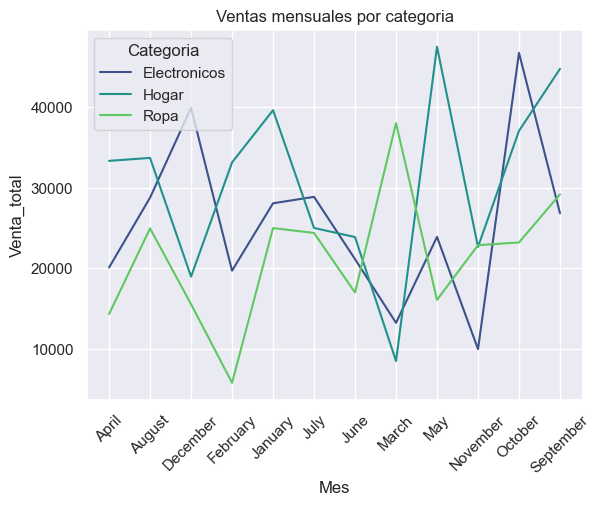

In [32]:
#Grafico 1: Ventas mensuales por categoria (Lineas)
df_mes_cat = df.groupby(['Mes','Categoria'])['Venta_total'].sum().reset_index()
sns.lineplot(
    data=df_mes_cat,
    x='Mes',
    y='Venta_total',
    hue='Categoria',
    markers='o',
    palette='viridis'
)
plt.title('Ventas mensuales por categoria')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Ventas totales por categoria')

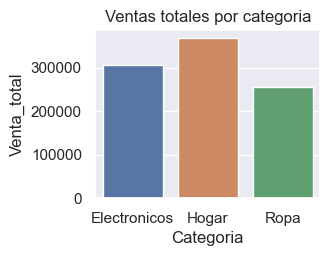

In [38]:
#Grafico 2: Ventas totales por categoria (Barras)
plt.subplot(2,2,2)
sns.barplot(
    data=ventas_por_categoria, x='Categoria', y='Venta_total', hue='Categoria'
)
plt.title('Ventas totales por categoria')

Text(0.5, 1.0, 'Distribuccion de precios por categoria')

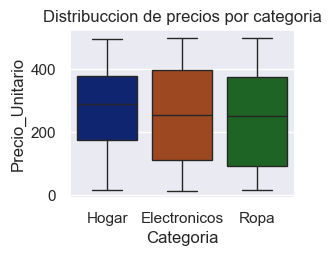

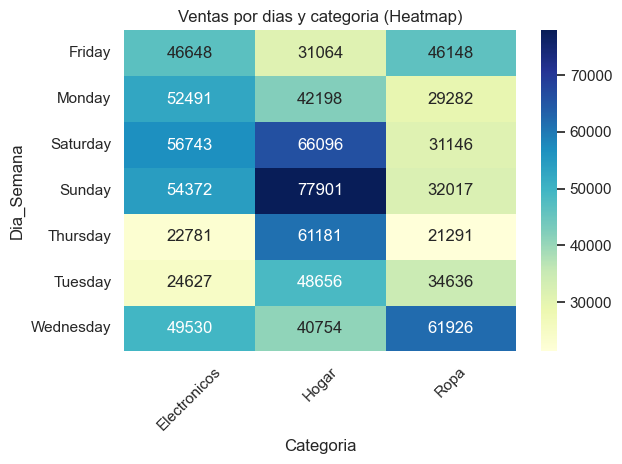

In [51]:
#Grafico 4: Ventas por dia de la semana (Heatmap)
ventas_dia_cat= df.groupby(['Dia_Semana','Categoria'])['Venta_total'].sum().unstack()
sns.heatmap(ventas_dia_cat, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Ventas por dias y categoria (Heatmap)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()